In [2]:
from lib.data import load_file

train = load_file()
train.head()

2017-11-28 10:43:06,417 - DEBUG - Log setup
2017-11-28 10:43:06,418 - INFO - Running on Linux:centos-desktop:3.10.0-693.5.2.el7.x86_64:#1 SMP Fri Oct 20 20:32:50 UTC 2017:x86_64
2017-11-28 10:43:06,419 - INFO - Using already cached file ./data/train.csv


,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
test = load_file("test")
test.head()

2017-11-28 10:43:08,634 - INFO - Using already cached file ./data/test.csv


,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
0,0,1,8,1,0,0,1,0,0,0,...,1,1,1,12,0,1,1,0,0,1
1,4,2,5,1,0,0,0,0,1,0,...,2,0,3,10,0,0,1,1,0,1
2,5,1,3,0,0,0,0,0,1,0,...,4,0,2,4,0,0,0,0,0,0
3,0,1,6,0,0,1,0,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,5,1,7,0,0,0,0,0,1,0,...,4,0,0,4,0,1,1,0,0,1


In [4]:
sample = load_file("sample")
sample.head()

2017-11-28 10:43:12,180 - INFO - Saving S3 thoolihan-data/Kaggle/PortoSeguro/sample_submission.csv to ./data/sample_submission.csv
2017-11-28 10:43:14,804 - INFO - Wrote ./data/sample_submission.csv


,target
id,
0,0.0364
1,0.0364
2,0.0364
3,0.0364
4,0.0364


In [5]:
list(train.columns.values)

['target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [6]:
X = train.drop(['target'], axis = 1)
y = train.target

In [7]:
X.shape

(595212, 57)

In [8]:
import pandas as pd
from sklearn.feature_selection import chi2

features, chi2s, pvals = [],[],[]

for col_name in X:
    col = X[col_name]
    present_x = (col >= 0)
    ch2_result = chi2(col[present_x].values.reshape(-1, 1), y[present_x])
    features.append(col_name)
    chi2s.append(ch2_result[0][0])
    pvals.append(ch2_result[1][0])

ch2_df = pd.DataFrame({"feature": features, "chi2": chi2s, "pval": pvals})
ch2_df[['feature', 'chi2', 'pval']].sort_values('pval', axis = 0, ascending = True).head()

,feature,chi2,pval
24,ps_car_04_cat,4119.848102,0.000000e+00
4,ps_ind_05_cat,2666.965280,0.000000e+00
16,ps_ind_17_bin,718.220742,3.262541e-158
6,ps_ind_07_bin,517.788573,1.281354e-114
14,ps_ind_15,474.207871,3.891472e-105


In [9]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

kbest = SelectKBest(k="all")
results = kbest.fit(X, y)
ch2_df['kbest_score'] = results.scores_
ch2_df.sort_values('pval', axis = 0, ascending = True).head()

,chi2,feature,pval,kbest_score
24,4119.848102,ps_car_04_cat,0.000000e+00,644.954458
4,2666.965280,ps_ind_05_cat,0.000000e+00,506.713136
16,718.220742,ps_ind_17_bin,3.262541e-158,818.284631
6,517.788573,ps_ind_07_bin,1.281354e-114,697.734436
14,474.207871,ps_ind_15,3.891472e-105,275.422471


In [10]:
ch2_df.to_csv("data/chi2_features.csv")

In [11]:
sig_features = ch2_df.pval < .05
ch2_df.feature[sig_features]

0         ps_ind_01
1     ps_ind_02_cat
2         ps_ind_03
3     ps_ind_04_cat
4     ps_ind_05_cat
5     ps_ind_06_bin
6     ps_ind_07_bin
7     ps_ind_08_bin
8     ps_ind_09_bin
11    ps_ind_12_bin
13        ps_ind_14
14        ps_ind_15
15    ps_ind_16_bin
16    ps_ind_17_bin
17    ps_ind_18_bin
18        ps_reg_01
19        ps_reg_02
20        ps_reg_03
21    ps_car_01_cat
22    ps_car_02_cat
23    ps_car_03_cat
24    ps_car_04_cat
26    ps_car_06_cat
27    ps_car_07_cat
28    ps_car_08_cat
29    ps_car_09_cat
31    ps_car_11_cat
33        ps_car_12
34        ps_car_13
36        ps_car_15
Name: feature, dtype: object

In [45]:
print(y.describe())
print(y[:20])
print(y.value_counts())
zeros = y.value_counts()[0]
ones = y.value_counts()[1]

print("Upsample magnitude to 50% would be {}".format(zeros / ones))        

count    595212.000000
mean          0.036448
std           0.187401
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: target, dtype: float64
id
7     0
9     0
13    0
16    0
17    0
19    0
20    0
22    0
26    0
28    1
34    0
35    0
36    0
43    0
46    0
48    0
50    0
58    0
61    0
64    1
Name: target, dtype: int64
0    573518
1     21694
Name: target, dtype: int64
Upsample magnitude to 50% would be 26.43671061122891


In [13]:
corr = train.corr()
corr

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,...,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,...,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,...,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,...,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,...,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,-0.005069,...,-0.001525,0.000975,0.001549,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279
ps_ind_06_bin,-0.034017,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,-0.384345,...,0.000822,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203
ps_ind_07_bin,0.034218,0.005700,0.016398,-0.060368,0.304949,-0.010382,-0.474009,1.000000,-0.260438,-0.280513,...,-0.000448,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961
ps_ind_08_bin,0.013147,0.188583,0.030945,0.014037,0.044978,0.004881,-0.356838,-0.260438,1.000000,-0.211173,...,-0.000632,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995
ps_ind_09_bin,-0.008237,0.162800,0.110076,0.111306,-0.011442,-0.005069,-0.384345,-0.280513,-0.211173,1.000000,...,0.000072,0.000664,0.001439,-0.000389,-0.000621,0.001059,0.001135,0.000815,-0.001103,-0.000123


''

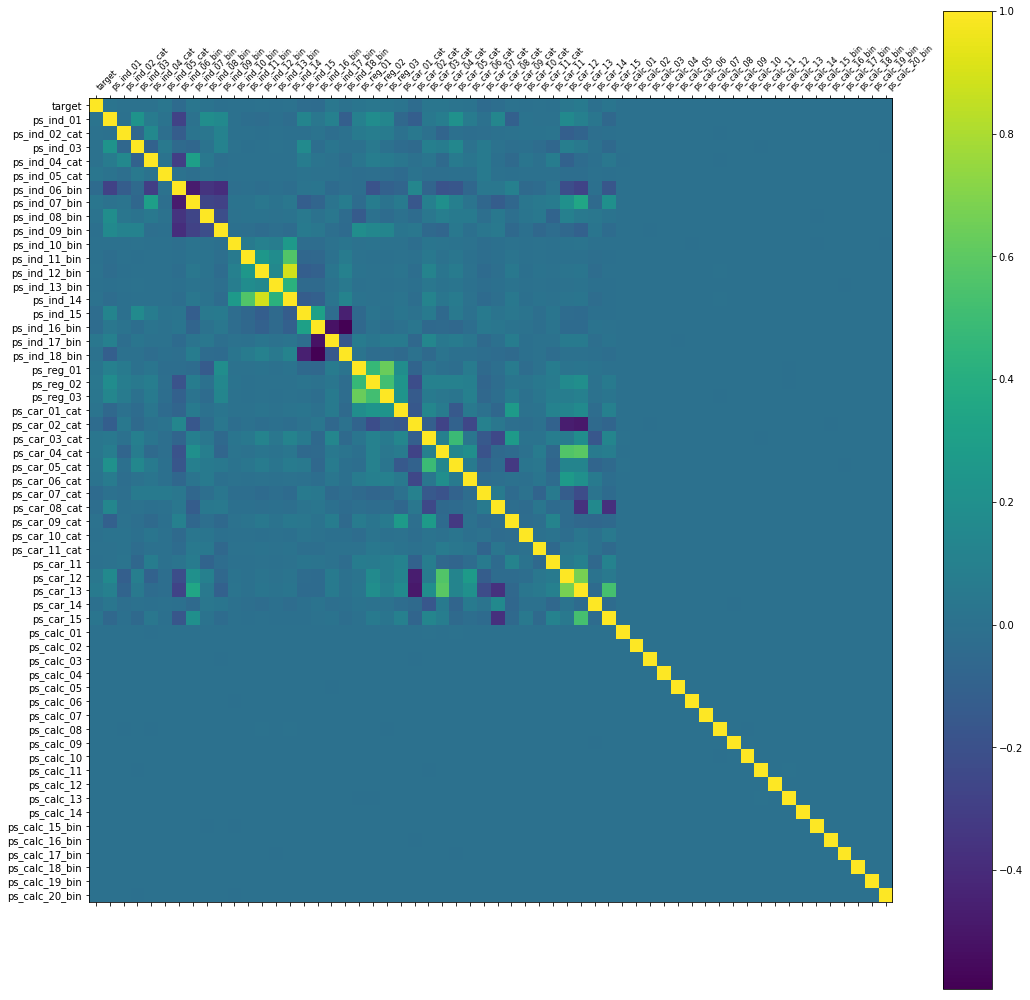

In [14]:
from matplotlib import pyplot as plt
%matplotlib inline

size = 18
fig, ax = plt.subplots(figsize = (size, size))
leg = ax.matshow(corr)
fig.colorbar(leg)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 45, horizontalalignment = 'left', fontsize = 8)
plt.yticks(range(len(corr.columns)), corr.columns)
;